In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('sales.csv')

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,1/3/2021,1/7/2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,1/4/2021,1/8/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,1/4/2021,1/8/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,1/4/2021,1/8/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,1/5/2021,1/12/2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [54]:
df.shape

(10018, 20)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10018 non-null  int64  
 1   Order ID        10018 non-null  object 
 2   Order Date      10018 non-null  object 
 3   Ship Date       10018 non-null  object 
 4   Ship Mode       10018 non-null  object 
 5   Customer ID     10018 non-null  object 
 6   Customer Name   10018 non-null  object 
 7   Segment         10018 non-null  object 
 8   Country/Region  10018 non-null  object 
 9   City            10018 non-null  object 
 10  State/Province  10018 non-null  object 
 11  Region          10018 non-null  object 
 12  Product ID      10018 non-null  object 
 13  Category        10018 non-null  object 
 14  Sub-Category    10018 non-null  object 
 15  Product Name    10018 non-null  object 
 16  Sales           10018 non-null  float64
 17  Quantity        10018 non-null 

In [56]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000
mean,5101.724396,229.476604,3.791675,0.156547,28.608454
std,2937.452367,622.559111,2.224143,0.206614,233.986466
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2571.250000,17.280000,2.000000,0.000000,1.724800
50%,5102.500000,54.490000,3.000000,0.200000,8.637550
75%,7642.750000,209.858000,5.000000,0.200000,29.353800
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


# Overall Business Performance

In [57]:
total_sales   = df['Sales'].sum()
print("total sales: ",total_sales)
total_profit  = df['Profit'].sum()
print("total profit",total_profit)
num_customers = df['Customer ID'].nunique()
print("no. of customers: ",num_customers)
num_orders    = df['Order ID'].nunique()
print("no. of orders: ",num_orders)
avg_order_val = total_sales / num_orders
print("average order value: ",avg_order_val)

total sales:  2298896.6163
total profit 286599.4911
no. of customers:  800
no. of orders:  5026
average order value:  457.4008388977318


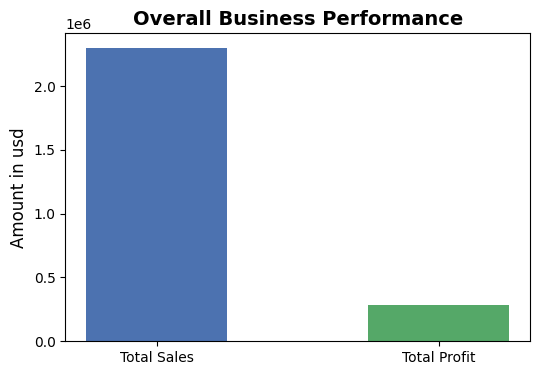

In [58]:
plt.figure(figsize=(6,4))
plt.bar('Total Sales', total_sales, color='#4C72B0',width=0.5)
plt.bar('Total Profit', total_profit, color='#55A868',width=0.5)
plt.title('Overall Business Performance', fontsize=14, fontweight='bold')
plt.ylabel('Amount in usd', fontsize=12)
plt.show()

# Category Performance Analysis

In [59]:
cat_sales  = df.groupby('Category')['Sales'].sum()
print(cat_sales)
cat_profit = df.groupby('Category')['Profit'].sum()
print(cat_profit)

Category
Furniture          742713.7753
Office Supplies    720028.8080
Technology         836154.0330
Name: Sales, dtype: float64
Category
Furniture           18391.6554
Office Supplies    122752.8876
Technology         145454.9481
Name: Profit, dtype: float64


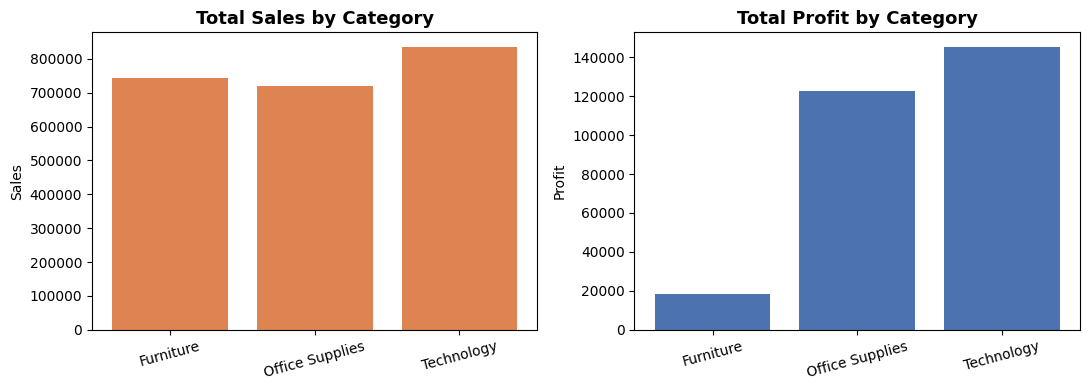

In [60]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.bar(cat_sales.index, cat_sales.values, color='#DD8452')
plt.title('Total Sales by Category', fontsize=13, fontweight='bold')
plt.ylabel('Sales')
plt.xticks(rotation=15)

plt.subplot(1,2,2)
plt.bar(cat_profit.index, cat_profit.values, color='#4C72B0')
plt.title('Total Profit by Category', fontsize=13, fontweight='bold')
plt.ylabel('Profit')
plt.xticks (rotation=15)

plt.tight_layout()
plt.show()

# Regional Profit

In [61]:
region_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
print(region_profit.round(2))

Region
West       33.85
East       31.94
South      28.86
Central    17.09
Name: Profit, dtype: float64


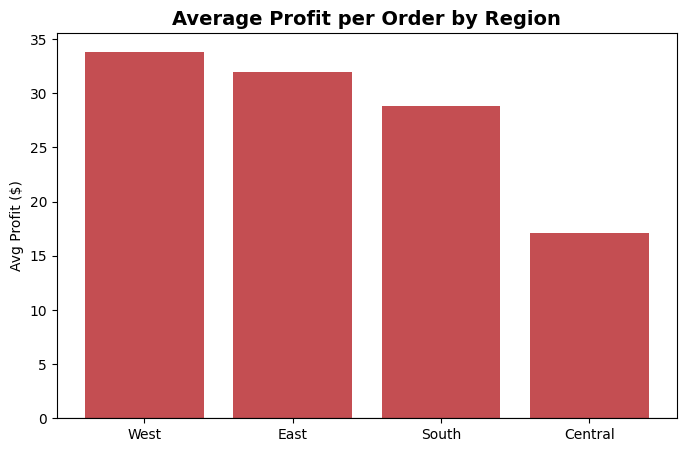

In [62]:
plt.figure(figsize=(8,5))
plt.bar(region_profit.index, region_profit.values, color='#C44E52')
plt.title('Average Profit per Order by Region', fontsize=14, fontweight='bold')
plt.ylabel('Avg Profit ($)')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

# Top Performing Products

In [63]:
top5 = df.groupby('Product Name')['Sales'].sum().nlargest(5)
top5

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


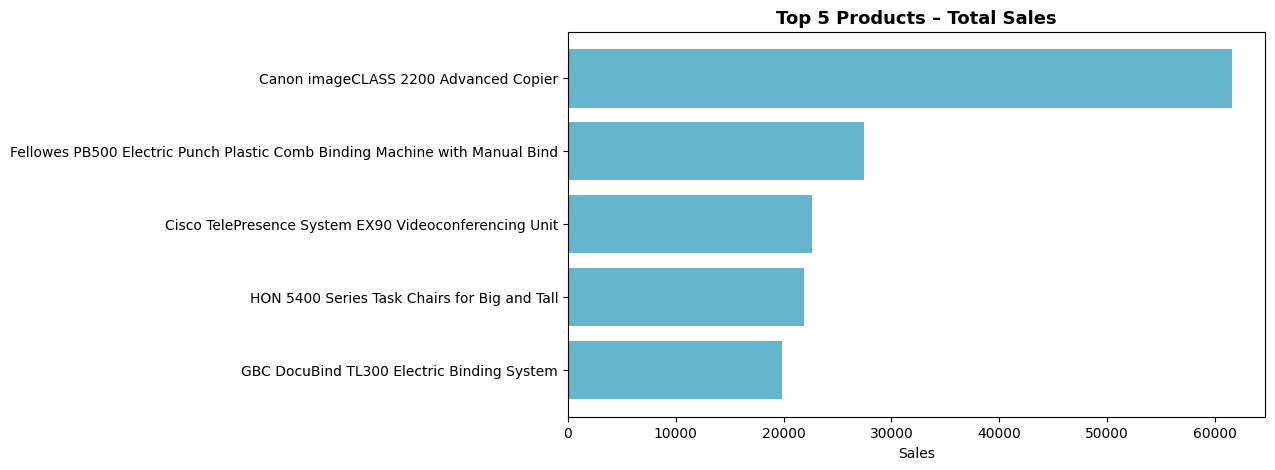

In [64]:
plt.figure(figsize=(9,5))
plt.barh(top5.index, top5.values, color='#64B5CD')
plt.title('Top 5 Products – Total Sales', fontsize=13, fontweight='bold')
plt.xlabel('Sales')
plt.gca().invert_yaxis()
plt.show()

# Monthly Sales Trend

In [65]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly = df.set_index('Order Date')['Sales'].resample('M').sum()
print(monthly.round(0))

Order Date
2021-01-31     14237.0
2021-02-28      4520.0
2021-03-31     55691.0
2021-04-30     28295.0
2021-05-31     23648.0
2021-06-30     34669.0
2021-07-31     33946.0
2021-08-31     27909.0
2021-09-30     81777.0
2021-10-31     31453.0
2021-11-30     78629.0
2021-12-31     69663.0
2022-01-31     18174.0
2022-02-28     11951.0
2022-03-31     38726.0
2022-04-30     34195.0
2022-05-31     30132.0
2022-06-30     24797.0
2022-07-31     28765.0
2022-08-31     36898.0
2022-09-30     64596.0
2022-10-31     31405.0
2022-11-30     75973.0
2022-12-31     75034.0
2023-01-31     18542.0
2023-02-28     22979.0
2023-03-31     51716.0
2023-04-30     38750.0
2023-05-31     56988.0
2023-06-30     40885.0
2023-07-31     39262.0
2023-08-31     31115.0
2023-09-30     73410.0
2023-10-31     59688.0
2023-11-30     79412.0
2023-12-31     97114.0
2024-01-31     43971.0
2024-02-29     20301.0
2024-03-31     59413.0
2024-04-30     36522.0
2024-05-31     44261.0
2024-06-30     53056.0
2024-07-31     45264.0


/tmp/ipython-input-3241241423.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Order Date')['Sales'].resample('M').sum()


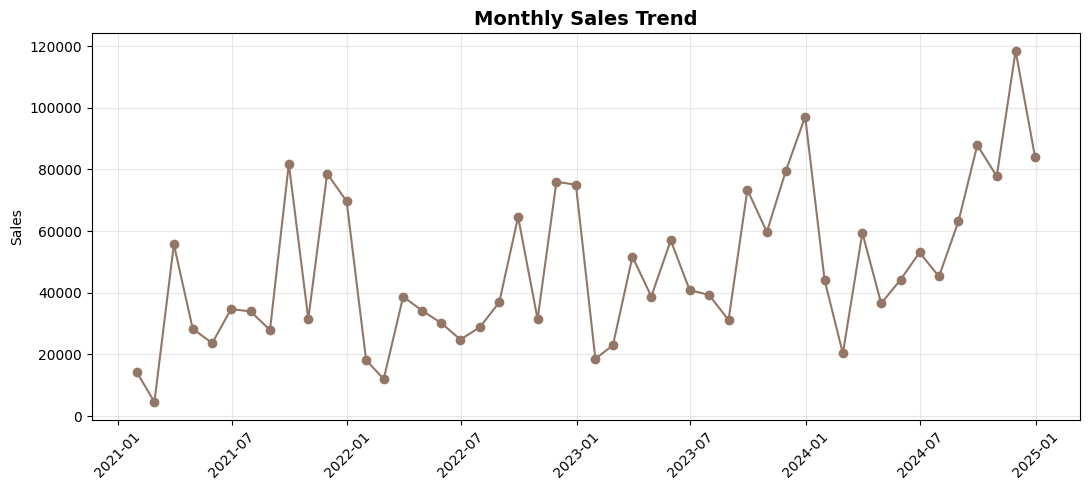

In [66]:
plt.figure(figsize=(11,5))
plt.plot(monthly.index, monthly.values, marker='o', color='#937666')
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.ylabel('Sales')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Discount Impact

In [67]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
disc_profit = df.groupby('Discount')['Profit'].mean()
disc_margin = df.groupby('Discount')['Profit_Margin'].mean()
print(disc_profit.round(2))
print(disc_margin.round(4))

Discount
0.00     66.90
0.10     96.06
0.15     27.29
0.20     24.65
0.30    -45.68
0.32    -88.56
0.40   -111.93
0.45   -226.65
0.50   -310.70
0.60    -41.97
0.70    -95.87
0.80   -101.80
Name: Profit, dtype: float64
Discount
0.00    0.3401
0.10    0.1558
0.15    0.0342
0.20    0.1769
0.30   -0.1155
0.32   -0.1743
0.40   -0.2225
0.45   -0.4545
0.50   -0.5491
0.60   -0.6774
0.70   -0.7947
0.80   -1.8250
Name: Profit_Margin, dtype: float64


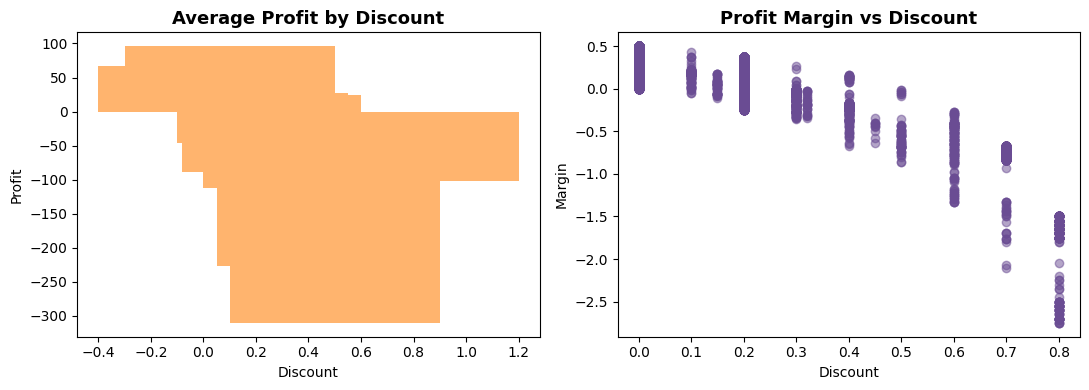

In [68]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.bar(disc_profit.index, disc_profit.values, color='#FFB46E')
plt.title('Average Profit by Discount', fontsize=13, fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.subplot(1,2,2)
plt.scatter(df['Discount'], df['Profit_Margin'], alpha=0.5, color='#6A4C93')
plt.title('Profit Margin vs Discount', fontsize=13, fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Margin')

plt.tight_layout()
plt.show()

# Shipping Mode Efficiency

In [69]:
ship_orders = df['Ship Mode'].value_counts()
print(ship_orders)
ship_avg = df.groupby('Ship Mode')['Sales'].mean()
print(ship_avg.round(2))

Ship Mode
Standard Class    5990
Second Class      1947
First Class       1538
Same Day           543
Name: count, dtype: int64
Ship Mode
First Class       228.50
Same Day          236.40
Second Class      235.92
Standard Class    227.01
Name: Sales, dtype: float64


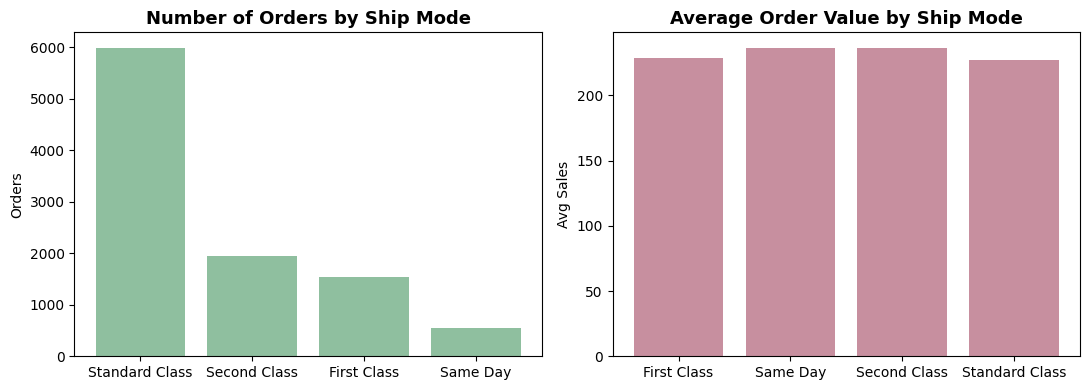

In [70]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.bar(ship_orders.index, ship_orders.values, color='#8FBF9F')
plt.title('Number of Orders by Ship Mode', fontsize=13, fontweight='bold')
plt.ylabel('Orders')

plt.subplot(1,2,2)
plt.bar(ship_avg.index, ship_avg.values, color='#C78F9F')
plt.title('Average Order Value by Ship Mode', fontsize=13, fontweight='bold')
plt.ylabel('Avg Sales')

plt.tight_layout()
plt.show()

# Sub‑Category Profit Margins

In [71]:
sub_margin = df.groupby('Sub-Category')['Profit_Margin'].mean().sort_values(ascending=False)
print(sub_margin.round(4))

Sub-Category
Labels         0.4297
Paper          0.4254
Envelopes      0.4231
Copiers        0.3172
Fasteners      0.2992
Art            0.2513
Accessories    0.2182
Furnishings    0.1320
Phones         0.1192
Supplies       0.1120
Storage        0.0891
Chairs         0.0460
Machines      -0.0720
Bookcases     -0.1266
Tables        -0.1477
Appliances    -0.1569
Binders       -0.1990
Name: Profit_Margin, dtype: float64


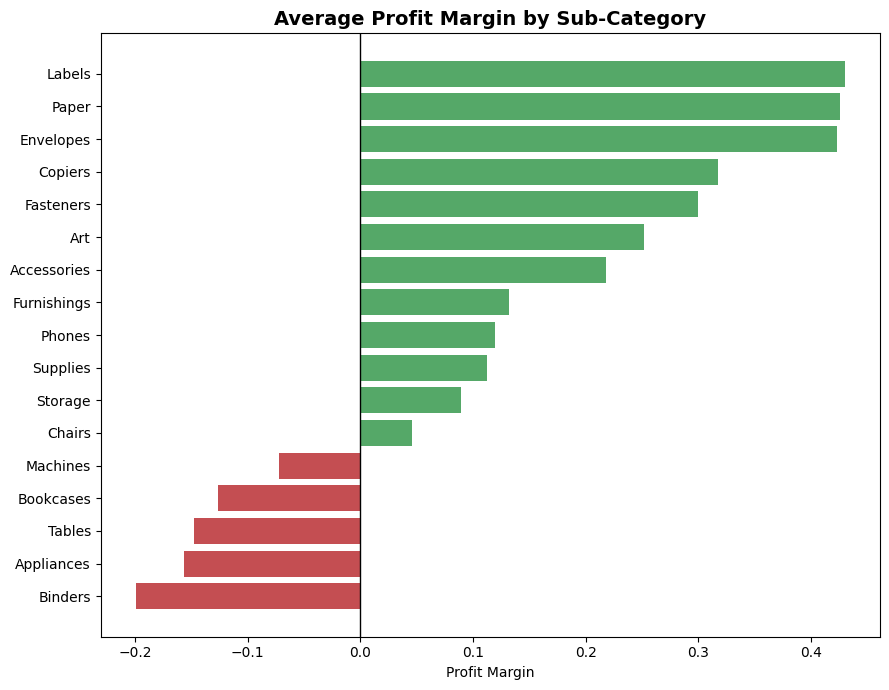

In [72]:
plt.figure(figsize=(9,7))
colors = ['#55A868' if x>0 else '#C44E52' for x in sub_margin]
plt.barh(sub_margin.index, sub_margin.values, color=colors)
plt.title('Average Profit Margin by Sub‑Category', fontsize=14, fontweight='bold')
plt.xlabel('Profit Margin')
plt.axvline(0, color='black', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 5 Customers by Sales

In [73]:
top_cust = df.groupby('Customer Name')['Sales'].sum().nlargest(5)
top_cust

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571


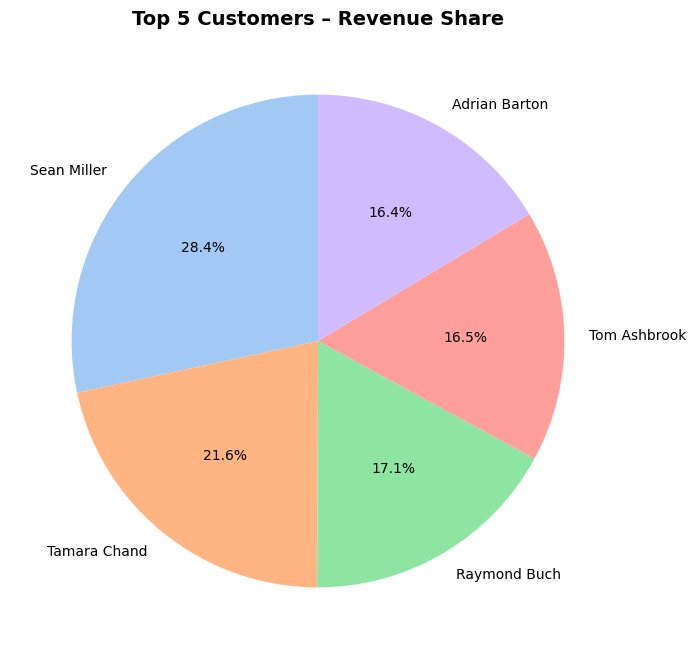

In [74]:
plt.figure(figsize=(8,8))
plt.pie(top_cust.values, labels=top_cust.index, autopct='%1.1f%%',startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 5 Customers – Revenue Share', fontsize=14, fontweight='bold')
plt.show()

# Quantity vs Profit Correlation

In [75]:
corr = df['Quantity'].corr(df['Profit'])
print(f"Correlation coefficient : {corr:.3f}")

Correlation coefficient : 0.066


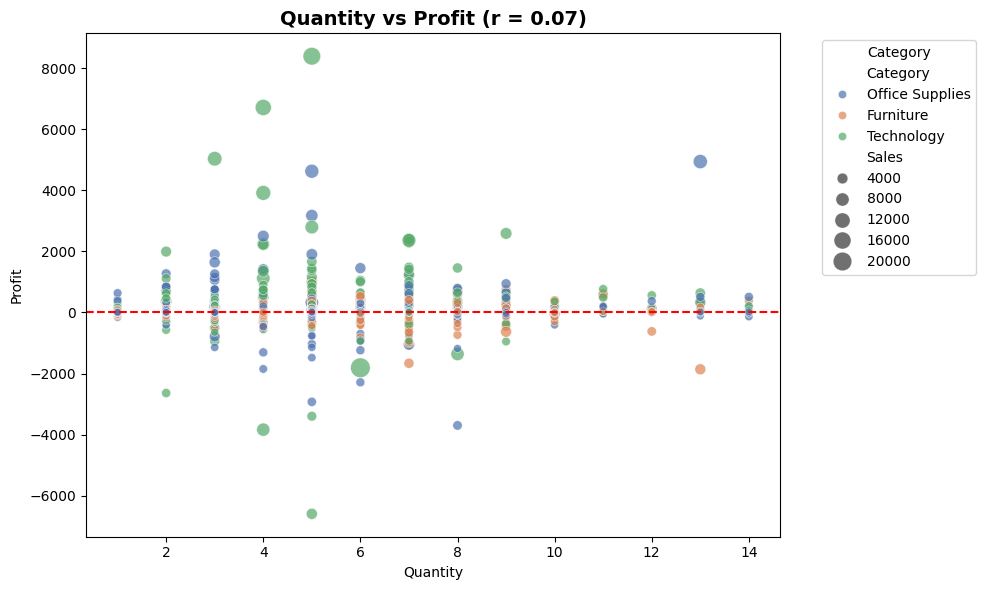

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', hue='Category',size='Sales', sizes=(30,200), data=df, alpha=0.7,palette='deep')
plt.title(f'Quantity vs Profit (r = {corr:.2f})', fontsize=14, fontweight='bold')
plt.axhline(0, color='red', linestyle='--')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# *Business insight*

In [77]:
if corr > 0.3:
    strength = "positive"
elif corr < -0.3:
    strength = "negative"
else:
    strength = "weak"
print(f"There is a {strength} relationship (r = {corr:.2f}).")

There is a weak relationship (r = 0.07).
